In [1]:
# Make necesary imports

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import cv2

In [2]:
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

objpoints = [] 
imgpoints = [] 

In [3]:
# Read all the chessboard images for Camera calibration

images = glob.glob('C:/Users/Lenovo/Desktop/Nanodegree/New_cam_cal/cali*.jpg')

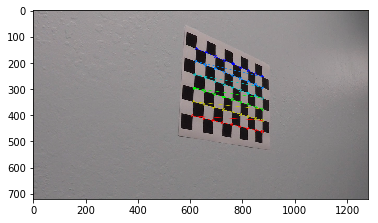

In [4]:
# Find all corners and draw on test image

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        
        plt.imshow(img)

Text(0.5, 1.0, 'Undistorted Image')

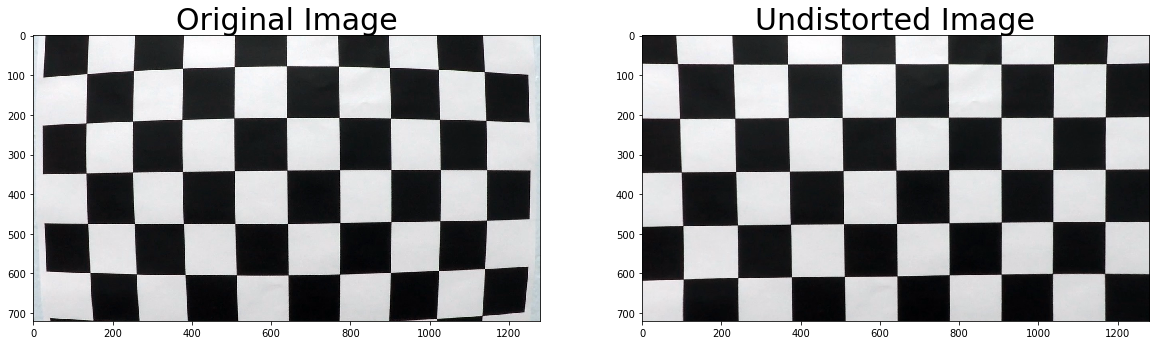

In [5]:
import pickle
%matplotlib inline

# Import the test image 

img = cv2.imread('C:/Users/Lenovo/Desktop/Nanodegree/New_cam_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Extract matrix and distortion co-eff

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_image.jpg',dst)

dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "wide_dist_pickle.p", "wb" ) )

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [6]:
def gradient_threshold(image):
    
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    #h_channel = hls[:, :, 0]
    #l_channel = hls[:, :, 1]
    s_channel = hls[:, :, 2]

    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    abs_sobelx = np.absolute(sobelx)
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    thresh_min = 20
    thresh_max = 95
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    s_thresh_min = 165
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

    color_binary = np.dstack((np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

    #f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    #ax1.set_title('Stacked thresholds')
    #ax1.imshow(color_binary)

    #ax2.set_title('Combined S channel and gradient thresholds')
    #ax2.imshow(combined_binary, cmap = 'gray')
    
    return combined_binary

In [7]:
def warp(img):
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32(
    [
        [760, 450],
        [1270, 678],
        [205, 700],
        [574, 450]
    ])
    
    dst = np.float32(
    [
        [1250, 0],
        [1250, 700],
        [100, 700],
        [100, 0]
    ])
    
    M = cv2.getPerspectiveTransform(src, dst)
    
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(img, M, img_size, flags = cv2.INTER_LINEAR)
    
    return warped


#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
#ax1.imshow(combined_binary, cmap = 'gray')
#ax1.set_title('Source Image', fontsize=30)
#ax2.imshow(warped_img, cmap = 'gray')
#ax2.set_title('Warped Image', fontsize=30)

In [8]:
def hist(img):

    bottom_half = img[img.shape[0]//2:,:]

    histogram = np.sum(bottom_half, axis=0)
    
    return histogram

1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831

1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831

1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831

1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831

1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831657232 1976.2967307714703
1625.0601831

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


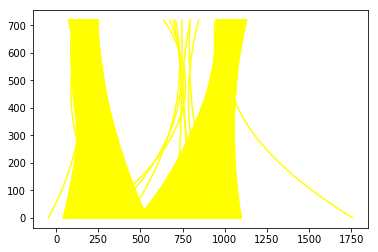

In [9]:
video = cv2.VideoCapture('C:/Users/Lenovo/Desktop/Nanodegree/project_video.mp4')

#fourcc = cv2.VideoWriter_fourcc(*'XVID') 
#out = cv2.VideoWriter('project_video_output.avi', fourcc, 25.0, (1280, 720))

while (True):
    
    ret, frame = video.read()
    
    img = gradient_threshold(frame)
    
    warped_img = warp(img)
    
    cv2.waitKey(40)
    
    histogram = hist(warped_img)
    #plt.plot(histogram)
    
    histogram = np.sum(warped_img[warped_img.shape[0]//2:,:], axis=0)

    out_img = np.dstack((warped_img, warped_img, warped_img))*255
    
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    nwindows = 9
    margin = 100
    minpix = 50

    window_height = np.int(warped_img.shape[0]//nwindows)

    nonzero = warped_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    leftx_current = leftx_base
    rightx_current = rightx_base

    left_lane_inds = []
    right_lane_inds = []
    
    for window in range(nwindows):
    
        win_y_low = warped_img.shape[0] - (window+1)*window_height
        win_y_high = warped_img.shape[0] - window*window_height
    
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        #np.concatenate(left_lane_inds, good_left_inds)
        #np.concatenate(right_lane_inds, good_right_inds)
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
    
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
            
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        pass

    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    ploty = np.linspace(0, warped_img.shape[0]-1, warped_img.shape[0])
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    leftx, lefty, rightx, righty, out_img = leftx, lefty, rightx, righty, out_img

    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    ploty = np.linspace(0, warped_img.shape[0]-1, warped_img.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    
    nonzero = warped_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    ploty = np.linspace(0, warped_img.shape[0]-1, warped_img.shape[0])
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    out_img = np.dstack((warped_img, warped_img, warped_img))*255
    window_img = np.zeros_like(out_img)
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                            ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                            ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))
    
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    #plt.plot(left_fitx, ploty, color='yellow')
    #plt.plot(right_fitx, ploty, color='yellow')
    
    #plt.imshow(result)
    
    
    np.random.seed(0)

    ploty = np.linspace(0, 719, num=720)
    quadratic_coeff = 3e-4
    
    leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])
    rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

    leftx = leftx[::-1]
    rightx = rightx[::-1]  

    left_fit = np.polyfit(ploty, leftx, 2)
    right_fit = np.polyfit(ploty, rightx, 2)
    
    ploty, left_fit, right_fit = ploty, left_fit, right_fit

    y_eval = np.max(ploty)

    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    
    print(left_curverad, right_curverad)
    
    mark_size = 3
    #plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
    #plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
    #plt.xlim(0, 1280)
    #plt.ylim(0, 720)
    #plt.plot(left_fitx, ploty, color='green', linewidth=3)
    #plt.plot(right_fitx, ploty, color='green', linewidth=3)
    #plt.gca().invert_yaxis()
    
    ym_per_pix = 30/720 
    xm_per_pix = 3.7/700

    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    
    ym_per_pix = 30/720 
    xm_per_pix = 3.7/700 

    ploty, left_fit, right_fit = ploty, left_fit_cr, right_fit_cr

    y_eval = np.max(ploty)

    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    
    #print(left_curverad, 'm', right_curverad, 'm')
    
    warp_zero = np.zeros_like(warped_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    
    src = np.float32(
        [
            [760, 450],
            [1270, 678],
            [205, 700],
            [574, 450]
        ])
    
    dst = np.float32(
        [
            [1250, 0],
            [1250, 700],
            [100, 700],
            [100, 0]
        ])

    Minv = cv2.getPerspectiveTransform(dst, src)

    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
    
    result = cv2.addWeighted(frame, 1, newwarp, 0.3, 0)
    
    #out.write(result)
    cv2.imshow('Result', result)